In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns

# Examine the Fisher info of orientation as a function of epoch while training an ImageNet network
##### Here AlexNet

In [3]:
folder = 'fisher_alexnet_layer2'

In [20]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    epoch = pickled_fisher.split('_')[2].split('.')[0]
    fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
    all_fishers[int(epoch)] = np.sqrt(fisher)

In [21]:
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,3131.571490,5189.497856,25472.743708,31504.307769,29605.424368,32199.855900,33838.373483,32886.566741,33410.089973,35119.190879,...,41921.584703,42071.185389,42177.679784,42294.814434,42452.106850,42313.806730,42512.823477,42439.827332,42665.238309,42838.057099
1,3137.905990,5071.021199,24399.748195,29273.557761,28830.870122,32340.480640,33494.609954,32758.379447,32279.931598,33461.357773,...,40338.245078,40562.827515,40569.180815,40749.526427,40831.047011,40839.304989,41000.667312,41027.865653,41081.582053,41237.868422
2,3083.089035,4850.608828,23545.632291,28536.998020,27571.325394,30719.407286,32122.803365,31289.381713,30507.423883,32516.933681,...,38086.886772,38263.703114,38276.499735,38466.638845,38571.221604,38505.835817,38695.172205,38707.945231,38706.784522,38938.204992
3,3066.627137,4541.630324,22129.430901,26535.433217,26477.207103,28915.526072,30282.321708,29377.307160,29181.534984,30638.305958,...,36336.820775,36506.695495,36510.394356,36713.730184,36771.676056,36691.734655,36948.628554,36897.873326,36950.180514,37147.979111
4,3070.362194,4397.800359,20447.978091,24277.779141,24314.494114,26607.345753,28455.327515,27327.774004,27091.250839,28394.923490,...,35068.324625,35259.364487,35260.034260,35441.119621,35554.430160,35419.038496,35657.316556,35663.409596,35746.914832,35914.297988


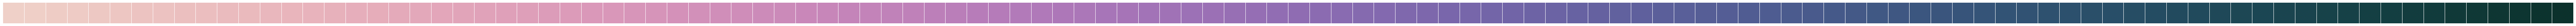

In [22]:
cs = sns.cubehelix_palette(len(all_fishers), hue = 0.9, start = 5, rot=0.8)
sns.palplot(cs)

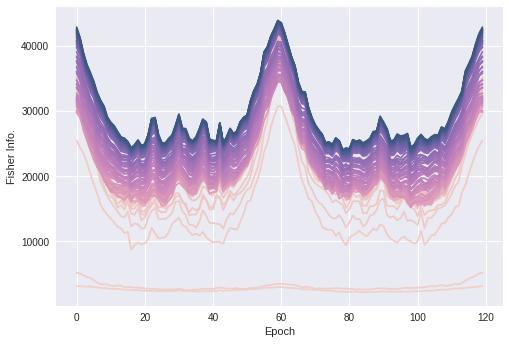

In [25]:
for c in all_fishers:
    plt.plot(all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.show()

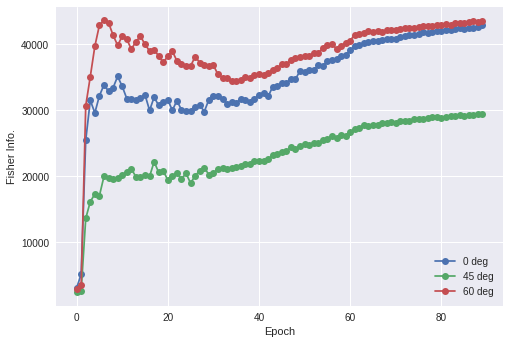

In [24]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[30,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[60,:],"-o", label = "60 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.legend()
plt.show()

# Now for layer 3

In [11]:
folder = 'fisher_alexnet_layer3'

In [12]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    try:
        epoch = float(pickled_fisher.split('_')[2].split('.')[0]) +\
                    float("."+pickled_fisher.split('_')[2].split('.')[2])
    except:
        continue
    fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
    all_fishers[float(epoch)] = np.sqrt(fisher)
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()


,0.0,0.1997602876548142,0.3995205753096284,0.5992808629644427,0.7990411506192568,0.9988014382740711,1.0,1.1997602876548141,1.3995205753096285,1.5992808629644428,...,88.39952057530962,88.59928086296445,88.79904115061926,88.99880143827407,89.0,89.19976028765481,89.39952057530962,89.59928086296445,89.79904115061926,89.99880143827407
0,3131.471539,2992.778642,2619.427800,2010.246440,2724.345518,5331.562623,4725.501878,9332.287179,12944.253397,18633.932918,...,42649.078208,42782.390396,42884.272921,42841.092797,42834.876258,42975.317939,42895.501676,42872.055981,42919.009122,42936.531392
1,3137.849582,2990.696407,2600.315942,1979.307707,2683.564421,5089.864242,4629.316580,8472.463160,12266.003750,17297.350549,...,41142.739238,41238.233134,41342.665613,41242.936850,41233.533538,41348.334138,41310.771477,41234.204054,41396.044642,41336.234565
2,3082.939182,2923.780772,2564.916665,1957.479502,2628.799821,4891.097218,4412.298494,7936.759288,11673.916224,16420.250912,...,38809.090894,38914.101917,38982.121030,38937.861472,38935.788781,38992.485840,38942.159365,38916.193853,39053.902443,39059.896569
3,3066.530776,2914.050103,2529.629617,1938.085976,2587.313665,4641.386862,4142.211004,7441.446096,11525.507017,15540.332043,...,37102.314753,37140.851040,37192.141966,37153.350535,37145.646313,37233.206684,37232.042974,37198.365555,37242.528808,37299.411255
4,3070.251781,2921.071036,2542.273982,1950.039743,2584.452747,4483.452464,4046.931924,7062.579132,10786.639885,14735.602601,...,35790.809100,35866.042324,35953.651942,35918.257419,35908.919449,35968.067616,35940.437838,35895.006004,35967.649464,35985.518865


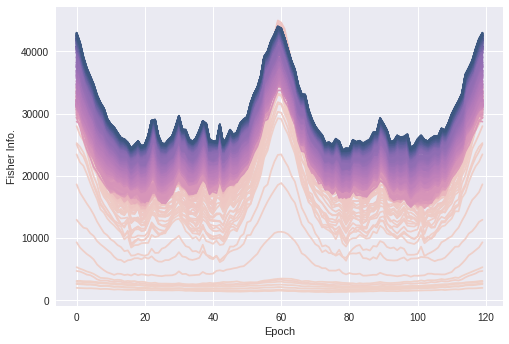

In [18]:
for c in all_fishers:
    plt.plot(all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.show()

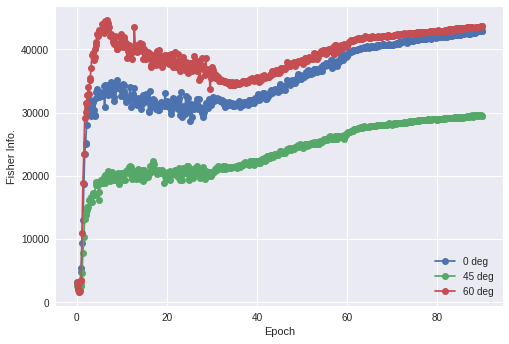

In [17]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[30,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[60,:],"-o", label = "60 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.legend()
plt.show()